In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is version 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.0.1
3.1


In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [5]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [6]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [7]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=('A.1_Expected Annual Damage', 'A.1_Dike Investment Costs'), function=<function sum_over at 0x173f525c0>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths',), function=<function sum_over at 0x173f525c0>)
ScalarOutcome('A.2 Total Costs', variable_name=('A.2_Expected Annual Damage', 'A.2_Dike Investment Costs'), function=<function sum_over at 0x173f525c0>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths',), function=<function sum_over at 0x173f525c0>)
ScalarOutcome('A.3 Total Costs', variable_name=('A.3_Expected Annual Damage', 'A.3_Dike Investment Costs'), function=<function sum_over at 0x173f525c0>)
ScalarOutcome('A.3_Expected Number of Deaths', variable_name=('A.3_Expected Number of Deaths',), function=<function sum_over at 0x173f525c0>)
ScalarOutcome('A.4 Total Costs', variable_name=('A.4_Expected Annual Damage', 'A.4_Dike Investment Costs'), functio

In [8]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=4)

[MainProcess/INFO] pool started with 10 workers
[MainProcess/INFO] performing 50 scenarios * 4 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [00:03<00:00, 58.12it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [9]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,116,293.027676,1.5,0.613777,32.516824,10.0,0.285889,76.502795,1.0,0.645523,...,0,9,2,5,3,6,4,4,0,dikesnet
1,96,349.017651,10.0,0.234069,56.644639,10.0,0.250254,150.472698,1.5,0.890522,...,0,9,2,5,3,6,4,5,0,dikesnet
2,107,60.988931,1.5,0.550328,123.867620,1.0,0.380373,107.980343,10.0,0.328235,...,0,9,2,5,3,6,4,6,0,dikesnet
3,126,154.187409,1.0,0.883615,96.578952,1.5,0.905995,230.343884,1.5,0.364026,...,0,9,2,5,3,6,4,7,0,dikesnet
4,16,129.323989,10.0,0.245284,277.610701,1.5,0.062346,270.065996,1.5,0.775697,...,0,9,2,5,3,6,4,8,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,111,322.528543,1.0,0.347299,171.007747,1.0,0.971429,38.078750,1.5,0.498765,...,9,6,3,0,6,2,0,49,3,dikesnet
196,25,217.480801,1.5,0.903265,231.394529,1.5,0.135897,178.962890,1.0,0.123667,...,9,6,3,0,6,2,0,50,3,dikesnet
197,59,305.475006,1.0,0.760999,348.077810,1.0,0.339596,140.256095,1.5,0.168469,...,9,6,3,0,6,2,0,51,3,dikesnet
198,22,83.265173,10.0,0.136779,240.784110,1.5,0.026115,273.756544,1.5,0.786175,...,9,6,3,0,6,2,0,52,3,dikesnet


In [10]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,1.316330e+08,0.000000,2.348628e+08,0.001193,8.101385e+07,0.000000,6.843285e+07,0.001274,1.252744e+08,0.000000,1.003100e+09,3558.137380
1,1.866663e+08,0.006260,2.208634e+08,0.000000,8.101385e+07,0.000000,2.819597e+07,0.000010,1.252744e+08,0.000000,1.003100e+09,1128.981128
2,1.316330e+08,0.000000,2.273456e+08,0.000564,8.691777e+07,0.000954,3.348651e+07,0.000221,1.252744e+08,0.000000,1.003100e+09,894.600477
3,1.316330e+08,0.000000,2.208634e+08,0.000000,9.047194e+07,0.001992,4.931181e+07,0.001013,1.252744e+08,0.000000,1.003100e+09,2362.301506
4,1.766754e+08,0.004224,2.869692e+08,0.008536,8.101385e+07,0.000000,2.806514e+07,0.000000,1.252744e+08,0.000000,1.003100e+09,6010.225995
...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.663095e+08,0.000000,1.392282e+08,0.000000,7.701177e+07,0.000000,4.916802e+07,0.000000,3.104087e+08,0.157225,1.097400e+09,0.000000
196,2.663095e+08,0.000000,1.667716e+08,0.031227,7.701177e+07,0.000000,4.916802e+07,0.000000,7.401174e+07,0.000000,1.097400e+09,0.000000
197,2.663095e+08,0.000000,1.502156e+08,0.010295,7.701177e+07,0.000000,4.916802e+07,0.000000,9.471089e+07,0.018296,1.097400e+09,0.000000
198,2.663095e+08,0.000000,3.385102e+08,0.178669,7.701177e+07,0.000000,4.916802e+07,0.000000,7.401174e+07,0.000000,1.097400e+09,0.000000


In [11]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "All RfR",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1,
               "1_RfR 0": 1, "1_RfR 1": 1, "1_RfR 2": 1,
               "2_RfR 0": 1, "2_RfR 1": 1, "2_RfR 2": 1,
               "3_RfR 0": 1, "3_RfR 1": 1, "3_RfR 2": 1,
               "4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1,}
        )
    ),
    Policy(
        "No RfR",
        **dict(
            get_do_nothing_dict()
        )
    ),
]

In [12]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 10 workers
[MainProcess/INFO] performing 100 scenarios * 2 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [00:03<00:00, 54.06it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [13]:
experiments, outcomes = results

In [14]:
# only works because we have scalar outcomes
outcomes_df = pd.DataFrame(outcomes)
outcomes_df

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,0.000000e+00,0.000000,5.800179e+06,0.005135,3.883194e+06,0.006157,4.075175e+07,0.012515,0.000000e+00,0.000000,2.131200e+09,0.0
1,0.000000e+00,0.000000,3.249690e+07,0.028258,0.000000e+00,0.000000,0.000000e+00,0.000000,6.760414e+07,0.055240,2.131200e+09,0.0
2,0.000000e+00,0.000000,3.186387e+07,0.028894,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,2.131200e+09,0.0
3,0.000000e+00,0.000000,1.812794e+06,0.002053,0.000000e+00,0.000000,6.164166e+05,0.000333,7.390810e+06,0.007866,2.131200e+09,0.0
4,0.000000e+00,0.000000,1.832912e+06,0.002098,5.815246e+08,1.110088,2.667023e+07,0.009376,0.000000e+00,0.000000,2.131200e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.678306e+09,1.664998,3.183750e+07,0.027273,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0
196,2.656650e+09,1.648181,0.000000e+00,0.000000,1.751838e+09,2.672241,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0
197,2.277545e+09,1.486429,0.000000e+00,0.000000,1.695690e+07,0.029337,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0
198,2.795701e+09,1.622283,1.569222e+07,0.012799,0.000000e+00,0.000000,7.225956e+07,0.023212,0.000000e+00,0.000000,0.000000e+00,0.0


In [15]:
outcomes_df["policies"] = experiments.policy
outcomes_df


,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,policies
0,0.000000e+00,0.000000,5.800179e+06,0.005135,3.883194e+06,0.006157,4.075175e+07,0.012515,0.000000e+00,0.000000,2.131200e+09,0.0,All RfR
1,0.000000e+00,0.000000,3.249690e+07,0.028258,0.000000e+00,0.000000,0.000000e+00,0.000000,6.760414e+07,0.055240,2.131200e+09,0.0,All RfR
2,0.000000e+00,0.000000,3.186387e+07,0.028894,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,2.131200e+09,0.0,All RfR
3,0.000000e+00,0.000000,1.812794e+06,0.002053,0.000000e+00,0.000000,6.164166e+05,0.000333,7.390810e+06,0.007866,2.131200e+09,0.0,All RfR
4,0.000000e+00,0.000000,1.832912e+06,0.002098,5.815246e+08,1.110088,2.667023e+07,0.009376,0.000000e+00,0.000000,2.131200e+09,0.0,All RfR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.678306e+09,1.664998,3.183750e+07,0.027273,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,No RfR
196,2.656650e+09,1.648181,0.000000e+00,0.000000,1.751838e+09,2.672241,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,No RfR
197,2.277545e+09,1.486429,0.000000e+00,0.000000,1.695690e+07,0.029337,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,No RfR
198,2.795701e+09,1.622283,1.569222e+07,0.012799,0.000000e+00,0.000000,7.225956e+07,0.023212,0.000000e+00,0.000000,0.000000e+00,0.0,No RfR


In [24]:
to_plot = outcomes_df.columns.tolist()[6:]
to_plot

['A.4 Total Costs',
 'A.4_Expected Number of Deaths',
 'A.5 Total Costs',
 'A.5_Expected Number of Deaths',
 'RfR Total Costs',
 'Expected Evacuation Costs',
 'policies']

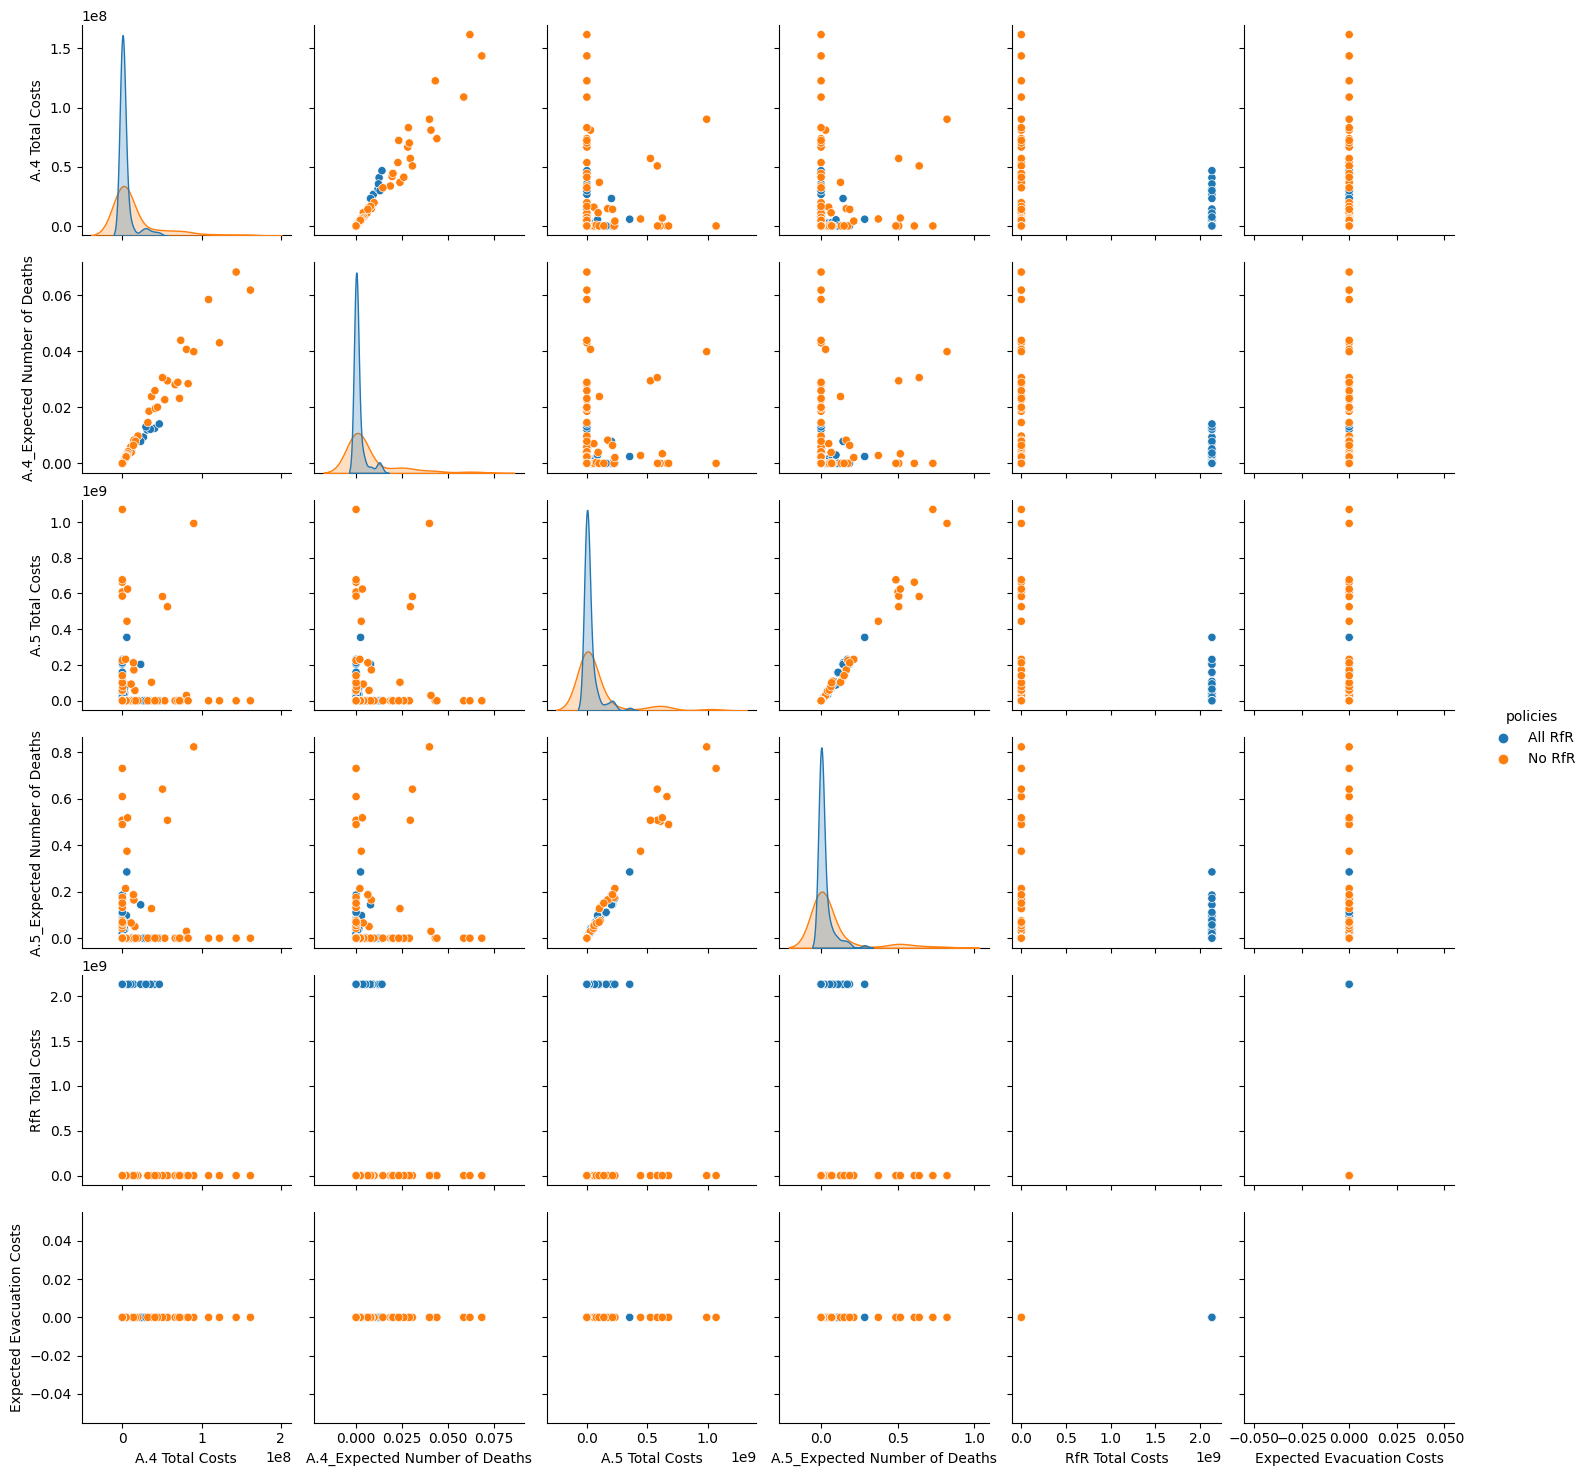

In [25]:
import seaborn

seaborn.pairplot(outcomes_df[to_plot], hue="policies")
plt.show()